In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import seaborn as sns


In [24]:
!pip3 install contextily

     |████████████████████████████████| 118 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 21.1 MB 5.2 MB/s eta 0:00:01


In [2]:
#reference system for Magna Sirgas Bogota zone
epsg = 3116

### Cargar los datos

In [3]:
receiver_survey = gpd.GeoDataFrame.from_file('../data_geometry/receiver_POSTPLOT_shapefile/receiver_shapes_tenerife.shp')
source_survey = gpd.GeoDataFrame.from_file('../data_geometry/source_POSTPLOT_shapefile/source_shapes_tenerife.shp')

In [4]:
receiver_survey

,RECEIVERSE,UNKNOWN2,ESTE,NORTE,ELEVACION,UNKNOWN2_1,TYPE,geometry
0,R3000,10371G1,1025139.0,1252080.9,92.0333,134217,receiver,POINT (1025139.000 1252080.900)
1,R3000,10381G1,1025158.3,1252077.6,91.5333,134217,receiver,POINT (1025158.300 1252077.600)
2,R3000,10391G1,1025178.6,1252074.0,94.7333,134217,receiver,POINT (1025178.600 1252074.000)
3,R3000,10401G1,1025198.0,1252070.6,97.1333,134217,receiver,POINT (1025198.000 1252070.600)
4,R3000,10411G1,1025217.6,1252067.3,100.0333,134217,receiver,POINT (1025217.600 1252067.300)
...,...,...,...,...,...,...,...,...
4327,R3252,11781G1,1028791.4,1256555.0,137.2344,90614,receiver,POINT (1028791.400 1256555.000)
4328,R3252,11791G1,1028811.2,1256551.5,135.7344,90614,receiver,POINT (1028811.200 1256551.500)
4329,R3252,11801G1,1028830.8,1256548.0,135.3344,90614,receiver,POINT (1028830.800 1256548.000)
4330,R3252,11811G2,1028830.8,1256548.0,135.3344,104452,receiver,POINT (1028830.800 1256548.000)


In [5]:
source_survey

,SHOTSEQ,UNKNOWN,DEPTHFT,UHT,ARCHIVO,ESTE,NORTE,ELEVACION,TYPE,geometry
0,S1054,300010.0,13.0,21,55,1025485.1,1252025.5,80.3333160428,source,POINT (1025485.100 1252025.500)
1,S1095,300010.0,13.0,31,56,1026296.5,1251886.5,105.9333161554,source,POINT (1026296.500 1251886.500)
2,S1216,3000100.0,8.5,9,57,1028671.4,1251467.3,82.5333162006,source,POINT (1028671.400 1251467.300)
3,S1198,3000100.0,7.5,6,58,1028326.9,1251533.7,82.6333162053,source,POINT (1028326.900 1251533.700)
4,S1162,3000100.0,8.5,14,59,1027614.4,1251650.9,81.8333162219,source,POINT (1027614.400 1251650.900)
...,...,...,...,...,...,...,...,...,...,...
3390,S1156,324510.0,13.0,83,600,1028342.9,1256500.8,96.6348114928,source,POINT (1028342.900 1256500.800)
3391,S1094,325110.0,13.0,223,601,1027140.7,1256832.3,127.2348115211,source,POINT (1027140.700 1256832.300)
3392,S1179,325010.0,13.0,133,602,1028810.2,1256524.9,136.7348115257,source,POINT (1028810.200 1256524.900)
3393,S1094,325010.0,13.0,213,603,1027140.7,1256819.0,127.5348115334,source,POINT (1027140.700 1256819.000)


#### Unificar los datos de receptores y fuentes en el mismo data frame para realizar cálculos como mapa de cobertura (fold) y visualización de la geometría

In [6]:
survey = receiver_survey.append(source_survey)

In [7]:
survey

,RECEIVERSE,UNKNOWN2,ESTE,NORTE,ELEVACION,UNKNOWN2_1,TYPE,geometry,SHOTSEQ,UNKNOWN,DEPTHFT,UHT,ARCHIVO
0,R3000,10371G1,1025139.0,1252080.9,92.0333,134217.0,receiver,POINT (1025139.000 1252080.900),NaN,NaN,NaN,NaN,NaN
1,R3000,10381G1,1025158.3,1252077.6,91.5333,134217.0,receiver,POINT (1025158.300 1252077.600),NaN,NaN,NaN,NaN,NaN
2,R3000,10391G1,1025178.6,1252074.0,94.7333,134217.0,receiver,POINT (1025178.600 1252074.000),NaN,NaN,NaN,NaN,NaN
3,R3000,10401G1,1025198.0,1252070.6,97.1333,134217.0,receiver,POINT (1025198.000 1252070.600),NaN,NaN,NaN,NaN,NaN
4,R3000,10411G1,1025217.6,1252067.3,100.0333,134217.0,receiver,POINT (1025217.600 1252067.300),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,NaN,NaN,1028342.9,1256500.8,96.6348114928,NaN,source,POINT (1028342.900 1256500.800),S1156,324510.0,13.0,83.0,600.0
3391,NaN,NaN,1027140.7,1256832.3,127.2348115211,NaN,source,POINT (1027140.700 1256832.300),S1094,325110.0,13.0,223.0,601.0
3392,NaN,NaN,1028810.2,1256524.9,136.7348115257,NaN,source,POINT (1028810.200 1256524.900),S1179,325010.0,13.0,133.0,602.0
3393,NaN,NaN,1027140.7,1256819.0,127.5348115334,NaN,source,POINT (1027140.700 1256819.000),S1094,325010.0,13.0,213.0,603.0


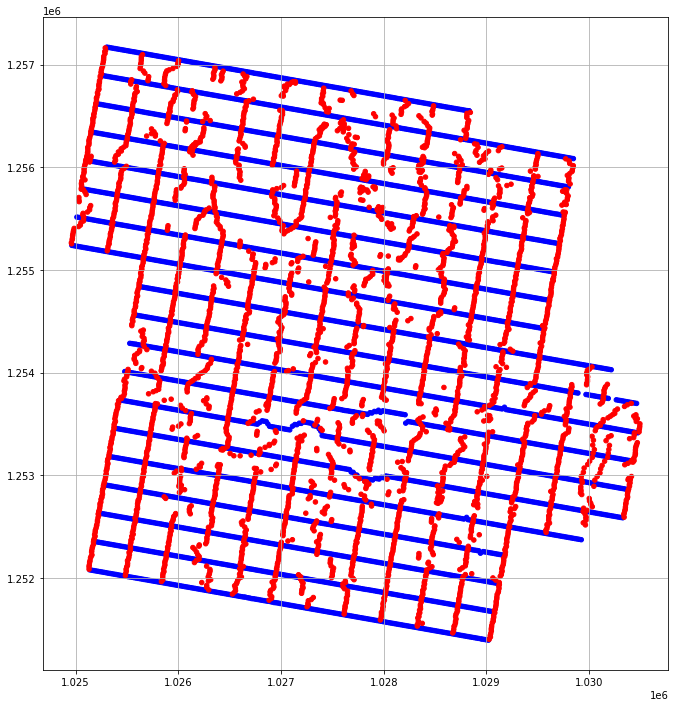

In [8]:
survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
plt.grid()
plt.show()

### Calcular parámetros de la geometría

In [9]:
NS = source_survey.shape[0]
NR = receiver_survey.shape[0]
print('Number of Sources =', NS)
print('Number of Receivers = ', NR)

Number of Sources = 3395
Number of Receivers =  4332


In [10]:
#Calculate number of receiver lines and number of receivers on each line
temprec = np.asarray(receiver_survey.RECEIVERSE)
rec_lines, rec_per_line = np.unique(temprec, return_counts=True)
NRL = rec_lines.size # Number of receiver lines
print('Receiver lines: ', rec_lines)
print('Receivers on each line: ', rec_per_line) #number of receivers per line
print('Number of receiver lines: ', NRL)

Receiver lines:  ['R3000' 'R3014' 'R3028' 'R3042' 'R3056' 'R3070' 'R3084' 'R3098' 'R3112'
 'R3126' 'R3140' 'R3154' 'R3168' 'R3182' 'R3196' 'R3210' 'R3224' 'R3238'
 'R3252']
Receivers on each line:  [198 198 198 198 234 252 252 252 252 243 234 235 234 234 234 234 234 234
 182]
Number of receiver lines:  19


In [11]:
#Calculate number of source lines and number of sources on each line
tempsrc = np.asarray(source_survey.SHOTSEQ)
src_lines, src_per_line = np.unique(tempsrc, return_counts=True)
NSL = src_lines.size # Number of source lines
print('Source lines: ', src_lines)
print('Sources on each line: ', src_per_line)#number of sources per line
print('Number of source lines: ', NSL)

#Otras formas de calcular el numero de fuentes en cada linea
#shot_count = source_survey.groupby('SHOTSEQ')['UNKNOWN'].count()
#shot_count = source_survey['SHOTSEQ'].value_counts()
#print(shot_count)


Source lines:  ['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1014' 'S1015'
 'S1016' 'S1017' 'S1018' 'S1019' 'S1020' 'S1021' 'S1023' 'S1027' 'S1029'
 'S1030' 'S1031' 'S1032' 'S1034' 'S1036' 'S1037' 'S1038' 'S1040' 'S1041'
 'S1042' 'S1043' 'S1044' 'S1045' 'S1046' 'S1047' 'S1048' 'S1049' 'S1050'
 'S1051' 'S1052' 'S1053' 'S1054' 'S1055' 'S1056' 'S1058' 'S1059' 'S1061'
 'S1062' 'S1063' 'S1064' 'S1065' 'S1066' 'S1067' 'S1068' 'S1069' 'S1070'
 'S1071' 'S1072' 'S1073' 'S1074' 'S1075' 'S1076' 'S1077' 'S1078' 'S1079'
 'S1080' 'S1081' 'S1084' 'S1085' 'S1086' 'S1087' 'S1088' 'S1089' 'S1090'
 'S1091' 'S1092' 'S1093' 'S1094' 'S1095' 'S1096' 'S1097' 'S1098' 'S1099'
 'S1100' 'S1101' 'S1102' 'S1103' 'S1104' 'S1105' 'S1106' 'S1107' 'S1108'
 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1115' 'S1117' 'S1118'
 'S1119' 'S1120' 'S1121' 'S1122' 'S1123' 'S1124' 'S1125' 'S1126' 'S1127'
 'S1128' 'S1129' 'S1130' 'S1131' 'S1132' 'S1133' 'S1134' 'S1135' 'S1136'
 'S1137' 'S1138' 'S1139' 'S1140' 'S1

### Calcular distancia entre fuentes para cada línea 

In [12]:
def calculate_srcdist(temps,coord):
    temps = temps.sort_values(by=[coord])    #Ordenar los puntos de una línea de norte a sur
    temps['idx'] = range(temps.shape[0])       #Asignar indice segun el orden de los puntos en la línea 
    temps = temps[['SHOTSEQ','geometry','idx']]  #Extraer solo la geometria y el indice de cada registro
    copy1_temps = temps['geometry'][:-1] #From first to penultimate
    copy2_temps = temps['geometry'][1:] #From second to last
    temps['distances'] = copy2_temps.distance(copy1_temps, align=False)  #Calcular distancia de un shot con el anterior
    temps.iloc[0,3] = 0    #Fijar la distancia del primer shot en cada línea en cero
    return temps
    

sourcedist_df = pd.DataFrame(columns = ['SHOTSEQ', 'geometry', 'idx', 'distances']) #Crear dataframe global vacío

for line in src_lines:
    temp_df = source_survey[source_survey['SHOTSEQ']==line]
    temp_df = calculate_srcdist(temp_df,'NORTE')
    sourcedist_df = sourcedist_df.append(temp_df)    #Agregar los registros de la línea de shot analizada al dataframe global
    


In [13]:
sourcedist_df.head()

,SHOTSEQ,geometry,idx,distances
2215,S1000,POINT (1024962.000 1255255.100),0,0.000000
2242,S1000,POINT (1024959.700 1255265.600),1,10.748953
2265,S1000,POINT (1024966.800 1255293.300),2,28.595454
2275,S1000,POINT (1024969.900 1255307.300),3,14.339107
2287,S1000,POINT (1024971.600 1255332.200),4,24.957965


#### Truncar las líneas de fuentes que tengan menos de cierta cantidad de fuentes, para poder calcular coherencia mutua

In [16]:
#source_survey['SHOTSEQ'].value_counts()>100
inds = np.where(src_per_line >22) # 22 es el umbral para obtener 17 lineas fuentes como dice el reporte observador
trunc_src_lines = src_lines[inds]
sourcedist_df = sourcedist_df.loc[sourcedist_df['SHOTSEQ'].isin(trunc_src_lines)]
sourcedist_df.head()


,SHOTSEQ,geometry,idx,distances
2215,S1000,POINT (1024962.000 1255255.100),0,0.000000
2242,S1000,POINT (1024959.700 1255265.600),1,10.748953
2265,S1000,POINT (1024966.800 1255293.300),2,28.595454
2275,S1000,POINT (1024969.900 1255307.300),3,14.339107
2287,S1000,POINT (1024971.600 1255332.200),4,24.957965


#### Calcular distancia promedio entre fuentes de cada línea
Observación: Estos promedios tienen ouliers debido a las fuentes ubicadas en off-set que generan líneas de disparos intermedias, con un número muy reducido de fuentes (hasta una sola fuente). Por eso en el paso anterior se descartaron las líneas con una cantidad reducida de fuentes.

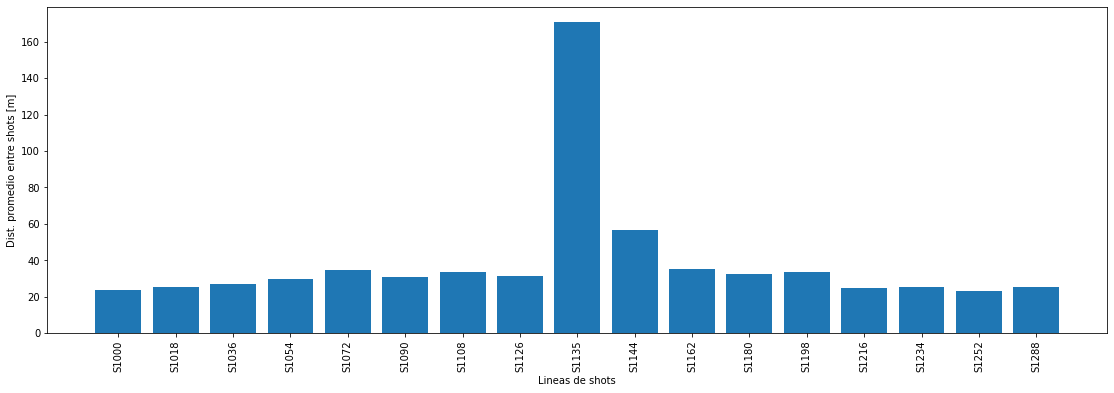

In [17]:
avg_shot_dist = sourcedist_df.groupby('SHOTSEQ')['distances'].mean()

plt.figure(figsize=(19, 6))
#plt.bar(src_lines,avg_shot_dist) #Antes de seleccionar subconjunto de líneas
plt.bar(trunc_src_lines,avg_shot_dist)
plt.xticks(rotation='vertical')
plt.xlabel('Lineas de shots')
plt.ylabel('Dist. promedio entre shots [m]')
plt.show()

#avg_shot_dist.head(18)

#### Calcular distancia entre receptores para cada línea

In [18]:
def calculate_recdist(temps,coord):
    temps = temps.sort_values(by=[coord])    #Ordenar los puntos de una línea de norte a sur
    temps['idx'] = range(temps.shape[0])       #Asignar indice segun el orden de los puntos en la línea 
    temps = temps[['RECEIVERSE','geometry','idx']]  #Extraer solo la geometria y el indice de cada registro
    copy1_temps = temps['geometry'][:-1] #From first to penultimate
    copy2_temps = temps['geometry'][1:] #From second to last
    temps['distances'] = copy2_temps.distance(copy1_temps, align=False)  #Calcular distancia de un shot con el anterior
    temps.iloc[0,3] = 0    #Fijar la distancia del primer shot en cada línea en cero
    return temps

receivdist_df = pd.DataFrame(columns = ['RECEIVERSE', 'geometry', 'idx', 'distances']) #Crear dataframe global vacío

for line in rec_lines:
    temp_df = receiver_survey[receiver_survey['RECEIVERSE']==line]
    temp_df = calculate_recdist(temp_df,'ESTE')        
    receivdist_df = receivdist_df.append(temp_df)    #Agregar los registros de la línea de receptores analizada al dataframe global
    

In [19]:
receivdist_df.head()

,RECEIVERSE,geometry,idx,distances
0,R3000,POINT (1025139.000 1252080.900),0,0.000000
1,R3000,POINT (1025158.300 1252077.600),1,19.580092
2,R3000,POINT (1025178.600 1252074.000),2,20.616741
3,R3000,POINT (1025198.000 1252070.600),3,19.695685
4,R3000,POINT (1025217.600 1252067.300),4,19.875865


#### Calcular distancias promedio para cada línea de receptoras
Observación: La distancia promedio en cada línea no se ve afectada debido a que no hay casos de receptoras ubicadas en offset.

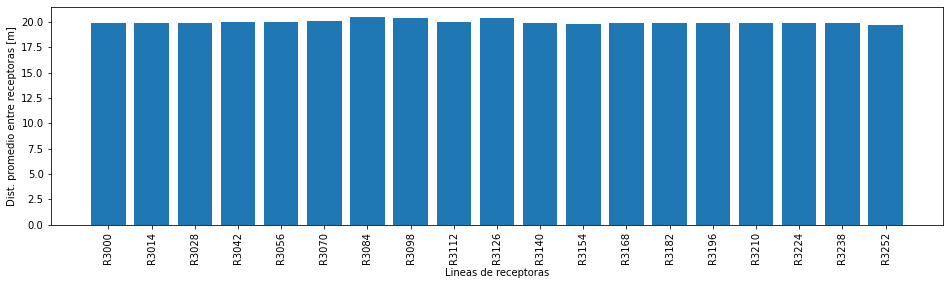

In [20]:
avg_receiv_dist = receivdist_df.groupby('RECEIVERSE')['distances'].mean()

plt.figure(figsize=(16, 4))
plt.bar(rec_lines,avg_receiv_dist)
plt.xticks(rotation='vertical')
plt.xlabel('Lineas de receptoras')
plt.ylabel('Dist. promedio entre receptoras [m]')
#plt.grid(axis = 'y')
plt.show()

#avg_receiv_dist.head(18)

#### Graficar geometría con subconjunto de líneas fuente seleccionadas

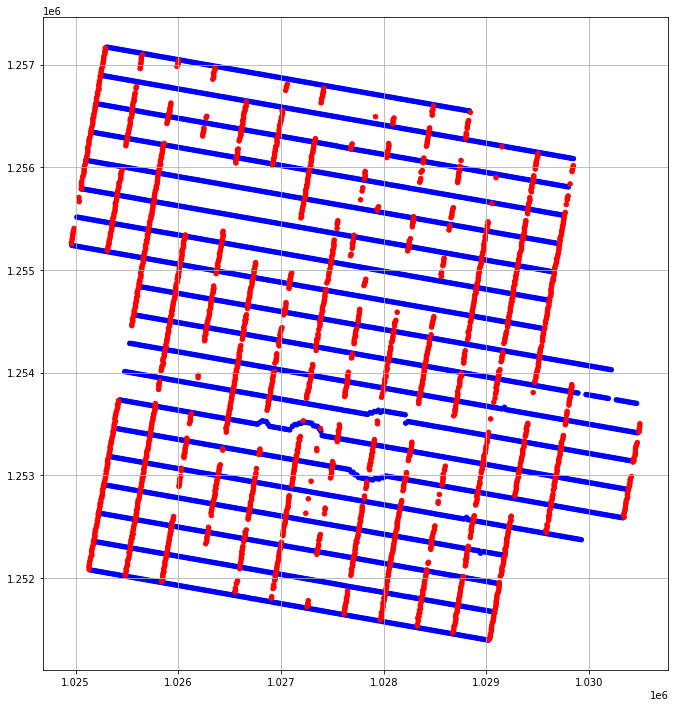

In [27]:
#import contextily as cx

#inds = np.where(src_per_line >22) # Ya fue calculado - 22 es el umbral para obtener 17 lineas fuentes como dice el reporte observador
source_trunc = source_survey.loc[source_survey['SHOTSEQ'].isin(trunc_src_lines)] #trunc_src_lines ya fue calculado
survey = receiver_survey.append(source_trunc)
ax = survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
#cx.add_basemap(ax, crs=survey.crs)
plt.grid()
plt.show()

#### Crear columna idy con base en la coordenada ESTE y construir la matriz binaria de representación de la geometría, para calcular coherencia mutua

3286


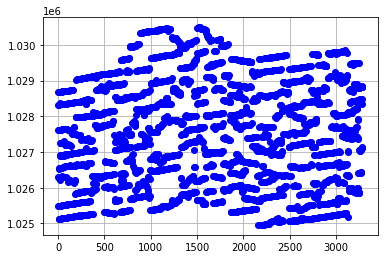

In [23]:
#Hacer matriz binaria de posiciones donde hay fuentes - no es posible usar la coordenada como indicador porque casi todos los shots tienen coordenada ESTE unica como se ve en la figura
print(source_survey.ESTE.unique().shape[0])
estes = source_survey.ESTE.unique()
plt.plot(estes, 'ob')
plt.grid()
plt.show()

In [14]:
s2 = survey.rotate(10, origin=survey.unary_union.centroid)
s2

0       POINT (1025551.179 1251698.612)
1       POINT (1025570.759 1251698.713)
2       POINT (1025591.376 1251698.693)
3       POINT (1025611.072 1251698.713)
4       POINT (1025630.947 1251698.867)
                     ...               
3390    POINT (1027938.897 1256607.715)
3391    POINT (1026697.397 1256725.419)
3392    POINT (1028394.913 1256712.594)
3393    POINT (1026699.707 1256712.321)
3394    POINT (1028426.046 1256727.223)
Length: 7727, dtype: geometry

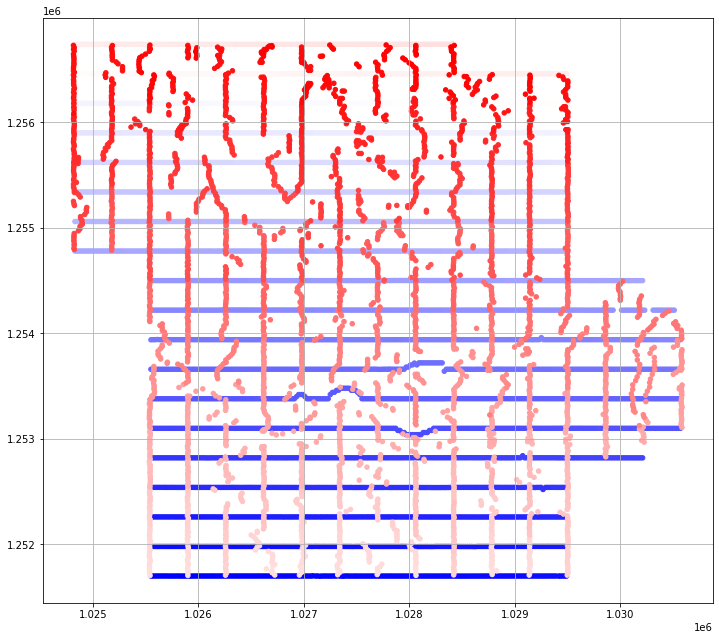

In [15]:
s2.plot(figsize=(12,12), cmap="bwr", markersize=20)
plt.grid()
plt.show()

Calculations required for the Fold:

In [16]:
#Calculate midpoints
rcvrs = s2[0:NR-1]
srcs = s2[NR:]

midpoint_list = [LineString([r, s]).interpolate(0.5, normalized=True)
                 for r in rcvrs
                 for s in srcs]

In [21]:
len(midpoint_list)

14703745

In [22]:
# Make a list of all the offsets when we count the midpoints into the bins.
offsets = [r.distance(s)
           for r in rcvrs
           for s in srcs]

azimuths = [np.arctan((r.x - s.x)/(r.y - s.y))
            for r in rcvrs
            for s in srcs]

In [23]:
# Make a Geoseries of the midpoints, offsets and azimuths:
midpoints = gpd.GeoDataFrame({'geometry': midpoint_list,
                              'offset': offsets,
                              'azimuth': np.degrees(azimuths),
                              })

midpoints[:5]


,geometry,offset,azimuth
0,POINT (1025726.410 1251701.382),350.505877,89.094151
1,POINT (1026138.016 1251703.387),1173.711042,89.533747
2,POINT (1027343.822 1251703.170),3585.297020,89.854307
3,POINT (1027168.424 1251705.955),3234.522260,89.739850
4,POINT (1026807.410 1251701.802),2512.469932,89.854476


In [24]:
#Spider plot (Might not be needed, but just in case)
midpoints['offsetx'] = offsets * np.cos(azimuths)
midpoints['offsety'] = offsets * np.sin(azimuths)
midpoints[:5].offsetx  # Easy!

0     5.541285
1     9.551138
2     9.116786
3    14.686223
4     6.381365
Name: offsetx, dtype: float64

In [25]:
x = [m.geometry.x for i, m in midpoints.iterrows()]
y = [m.geometry.y for i, m in midpoints.iterrows()]

In [27]:
#%matplotlib qt
fig = plt.figure(figsize=(12,8))
plt.quiver(x, y, midpoints.offsetx, midpoints.offsety, units='xy', width=0.5, scale=1/0.025, pivot='mid', headlength=0)
plt.axis('equal')
plt.show()

# Use ideal Preplot to create the Bins

In [1]:
#BINS - Created as new geometry from the ideal geometry (pre-plot)
# Parameters from report
si = 20            # Source point interval (m)
ri = 20            # Receiver point interval (m)
extent_c = s2.total_bounds 
extent = [extent_c[2]-extent_c[0], extent_c[3]-extent_c[1]]
#Extract coordinates of the bottom-left point
xmi = extent_c[0] #Easting of bottom-left corner of grid (m)
ymi = extent_c[1] #Northing of bottom-left corner (m)
rperline = int(extent[0]/ri) + 2
sperline = int(extent[1]/si) + 2

NameError: name 's2' is not defined

In [55]:
extent

[5769.373822248774, 5042.510292393621]

In [39]:
# Load preplot geometry
pre_r_survey = gpd.GeoDataFrame.from_file('../data_geometry/receiver_PREPLOT_shapefile/receiver_PREPLOT_shapefile.shp')
pre_s_survey = gpd.GeoDataFrame.from_file('../data_geometry/source_PREPLOT_shapefile/source_PREPLOT_shapefile.shp')
pre_r_survey['TYPE']='receiver'
pre_s_survey['TYPE']='source'

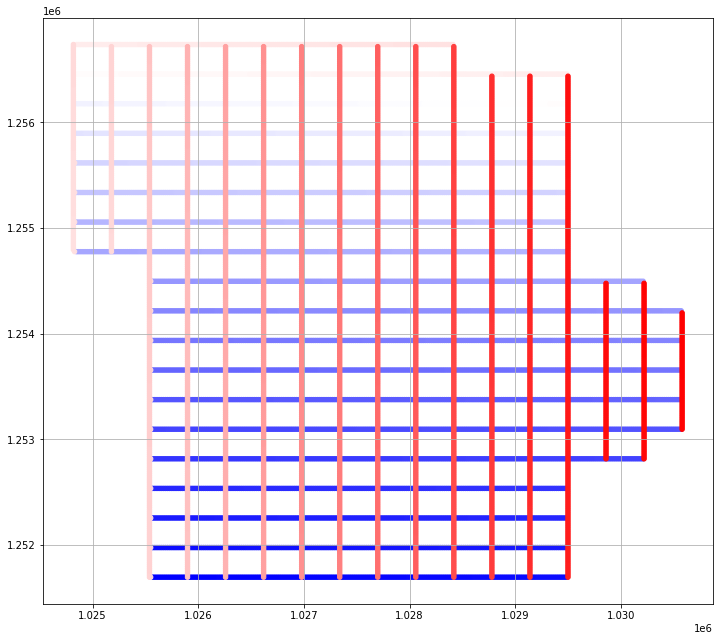

In [46]:
pre_survey = pre_r_survey.append(pre_s_survey)
#pre_survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
#plt.grid()
#plt.show()
pre_survey_rot = pre_survey.rotate(10, origin=pre_survey.unary_union.centroid)
pre_survey_rot.plot(figsize=(12,12), cmap="bwr", markersize=20)
plt.grid()
plt.show()


In [67]:
#Create the bin centres
# Factor to shift the bins relative to source and receiver points
jig = si / 2.
bin_centres = gpd.GeoSeries([Point(xmi + 0.5*r*ri + jig, ymi + 0.5*s*si + jig)
                             for r in range(2*rperline - 3)
                             for s in range(2*sperline - 2)
                            ])

# Buffers are diamond shaped so we have to scale and rotate them.
scale_factor = np.sin(np.pi/4.)/2.
bin_polys = bin_centres.buffer(scale_factor*ri, 1).rotate(-45)
bins = gpd.GeoDataFrame(geometry=bin_polys)

bins[:3]

,geometry
0,"POLYGON ((1024826.457 1251697.027, 1024816.457..."
1,"POLYGON ((1024826.457 1251707.027, 1024816.457..."
2,"POLYGON ((1024826.457 1251717.027, 1024816.457..."


In [65]:
bin_centres.plot(figsize=(12,12), markersize=10)
plt.grid()
plt.show()

In [68]:
%matplotlib qt
#%matplotlib inline #To display image within the cell
bins.plot(figsize=(12,12), edgecolor="black")

<AxesSubplot:>

In [74]:
bins['seqbin']=range(291962) #Number of bins obtained from bin_centres.shape
bins

,geometry,seqbin
0,"POLYGON ((1024826.457 1251697.027, 1024816.457...",0
1,"POLYGON ((1024826.457 1251707.027, 1024816.457...",1
2,"POLYGON ((1024826.457 1251717.027, 1024816.457...",2
3,"POLYGON ((1024826.457 1251727.027, 1024816.457...",3
4,"POLYGON ((1024826.457 1251737.027, 1024816.457...",4
...,...,...
291957,"POLYGON ((1030586.457 1256707.027, 1030576.457...",291957
291958,"POLYGON ((1030586.457 1256717.027, 1030576.457...",291958
291959,"POLYGON ((1030586.457 1256727.027, 1030576.457...",291959
291960,"POLYGON ((1030586.457 1256737.027, 1030576.457...",291960


In [69]:
def bin_the_midpoints(midpoints,bins):
    pointsInPolygon = gpd.sjoin(midpoints,bins, how="inner", op='intersects')
    pointsInPolygon['fold']=1
    pointsInPolygon.groupby('seqbin').sum()
    return gpd.GeoDataFrame(bins.join(pointsInPolygon.groupby('seqbin').sum()['fold']))

In [75]:
fold = bin_the_midpoints(midpoints,bins).fillna(-1)
fold.plot(column='fold',cmap='jet',edgecolor="black",legend=True, figsize=(10,12))
plt.show()

/Users/correa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
fold

,geometry,seqbin,fold
0,"POLYGON ((1024826.457 1251697.027, 1024816.457...",0,-1.0
1,"POLYGON ((1024826.457 1251707.027, 1024816.457...",1,-1.0
2,"POLYGON ((1024826.457 1251717.027, 1024816.457...",2,-1.0
3,"POLYGON ((1024826.457 1251727.027, 1024816.457...",3,-1.0
4,"POLYGON ((1024826.457 1251737.027, 1024816.457...",4,-1.0
...,...,...,...
291957,"POLYGON ((1030586.457 1256707.027, 1030576.457...",291957,-1.0
291958,"POLYGON ((1030586.457 1256717.027, 1030576.457...",291958,-1.0
291959,"POLYGON ((1030586.457 1256727.027, 1030576.457...",291959,-1.0
291960,"POLYGON ((1030586.457 1256737.027, 1030576.457...",291960,-1.0


In [90]:
#Save Fold as a shapefile
fold.to_file('../data_geometry/Fold_Postplot/Fold_PostPlot_V1.shp')

In [87]:
fold.plot(column='fold',cmap='jet',legend=True)
plt.show()